# **Penerapan *Particle Swarm Optimization* (PSO) Pada Knapsack Problem Untuk Optimasi Maksimasi Keuntungan Dalam Sebuah Pengiriman Barang**

---

**Kelompok 10 (RB)**
1.   Arfyani Deiastuti(120450006)
2.   Hanna Septiani(120450064)
3.   Alfianri Mahnihuruk(120450088)
4.   Junpito Salim(120450086)

# **Data Wringling - Data Visualization - Data Processing**

**Import Data**

In [ ]:
import pandas as pd   # import pandas menjadi pd
import numpy as np    # import numpy menjadi np                  

In [ ]:
# import data dari url yang ada menjadi df 
url = 'https://drive.google.com/file/d/1q2kygbNE1sdm6_94PWb3n7U3NRcHKHmR/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)       # mendefinisikan variabel df yaitu dengan fungsi read() untuk membaca file dari Data_Shoes
data = pd.DataFrame(df)     # mendefinisikan variabel data dari df dengan fungsi dataframe() 
data.head()                 # Memanggil data dari data teratas

In [ ]:
data.rename(columns = {'Weight(g)':'Weight'}, inplace=True)
data = data[['Price','Weight']]

In [ ]:
data.sum() # Menampilkan semua penjumlahan dari semua kolom

In [ ]:
data.info()

In [ ]:
# Menghitung mean, median, standar deviasi, dll dari Kolom Price dan Weight
data.describe()

**Visualisasi Data**

In [ ]:
# Import Library Matplotlib dan Seaborn untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Visualisasi Price dengan Line Chart
plt.plot(data['Price'],label='Price') # Melakukan ploting dengan data kolom Price dengan Label price
plt.legend();

In [ ]:
#Visualisasi Weight dengan Line Chart
plt.plot(data['Weight'],label='Weight') # Melakukan ploting dengan data kolo weight dengan label Weight
plt.legend();

In [ ]:
#Menampilkan Matriks Korelasi antara Price dengan Weight
f,ax=plt.subplots(figsize = (8,8))
# corr() is actually pearson correlation
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map') # Membuat judul plot
plt.show() # Menampilkan Hasil Ploting

In [ ]:
# Visualisasi Price dengan Digaram Batang
data1 = data['Price'] # Mengambil data dari data yang telah di defenisikan dengan kolom Price
sns.displot(data1, kde=True,bins=12) # Melakuakan Ploting dengan Jumlah diagram batang sebanyak 12
plt.xlabel('Price Brooks Running Shoes') # Membuat Label Plot
plt.show();# Menampilkan Ploting

In [ ]:
# Visualisasi Weight dengan Digaram Batang
data2 = data['Weight'] # Mengambil data dari data yang telah di defenisikan dengan kolom Weight
sns.displot(data2, kde=True, bins=12) # Melakuakan Ploting dengan Jumlah diagram batang sebanyak 12
plt.xlabel('Weight Brooks Running Shoes') # Membuat Label Plot
plt.show(); # Menampilkan Ploting

# ***Particle Swarm Optimization* (PSO)**

In [ ]:
# Generate individu menggunakan fungsi lambda dengan parameter
# n_individu, n_barang, a dan b yang dimana di generate dengan bilangan random
gen_individu = lambda n_individu,n_barang,a,b: np.random.uniform(a,b,(n_individu,n_barang))

In [ ]:
# Fungsi Konstrain
def f_constrain(X,data,lim): # defenisikan fungsi konstrain dengan parameter X, data(data yang kita miliki) dan limit
    return np.sum( X * data['Weight'].values ) <= lim # return fungsi dengan mengalikan  X dengan data(dengan kolom weight) yang di batasi dengan limit yang telah di tentukan di fungsi

def f_profit(X,data): # defenisikan fungsi Profit dengan parameter X dan Price 
    return np.sum(X * data['Price'].values) # return fungsi dengan mengalikan bilangan random dengan param X dan data pada kolo price
def f_obj(X,data,lim):
    return f_profit(X,data) if f_constrain(X,data,lim) else 0

In [ ]:
# Diskritisasi ini adalah fungsi untuk mengubah bentuk data awal menjadi bentuk diskrit dengan menggenapkan hasil dari simoid data
def diskritisasi(partikels):
    return np.round( 1/ ( 1 + np.exp(-1 * partikels) ) ) # ini adalah fungsi sigmoid 

In [ ]:
# Nilai Fitness
def calculate_fitness(partikels,data,p):        # Hasil discriditasi yang telah dilakukan tadi akan di masukkan ke rumus fittness dalam pso
    d_partikels = diskritisasi(partikels)       # Asign hasil diskriditasi ke variabel
    fitness = np.array( list(map( lambda x:f_obj(x,data,p['lim']) , d_partikels)))     # Perhitungan dengan rumus fittnes yang ada
    return fitness 

In [ ]:
def idx_sort_individu(fitnesses):     # Mengurutkan seluruh fitnesss yang ada
    return fitnesses.argsort()[::-1]    # Urutan secara ascending

def sort_PX(P,X,fts):                 # Menghasilkan urutan fitness p dan x dalam sebuah deret
    return P[fts] , X[fts]              # Mengeluarkan data fitness di p dan x

In [ ]:
def solusi(partikels_w_f):         # Mencari solusi dari pso 
    data_partikel = pd.DataFrame(diskritisasi(partikels_w_f[:,:-1]))        # Asiggned hasil diskriditasi dari semua partikel yang telah di jadikan dataframe menjadi sebuah variable
    cols = [ 'Barang' + str(i+1) for i in range( data_partikel.shape[1]) ]  # Mebuat sebuah kolom dengan nama barang-n 
    data_partikel.columns = cols                                            # Kolom yang ada di dataframe data_partikel berubah menjadi barang-n
    data_partikel['Profit'] = partikels_w_f[:,-1].reshape(-1,1)             # Membuat kolom profit di data_partikel yang akan di isi dengan pertikels_w_f
    return data_partikel             # Memanggil data pertikel yang telah di ubah tadi

In [ ]:
# Nilai Kecepatan Baru
def new_v( V, X , P, G ,p):      # Mendefenisikan Fungsi Kecepatan Baru
    r1 = np.random.uniform(0,1)    # Membuat nilai dari r1 dengan bilangan acak dengan range 1-0
    r2 = np.random.uniform(0,1)    # Membuat nilai dari r2 dengan bilangan acak dengan range 1-0
    term1 = p['W1'] * r1 * ( P-X ) # Membuat Nilai term 1
    term2 = p['W2'] * r2 * ( G-X)  # Membuat Nilai term 2
    return V + term1 + term2       # Mereturn nilai keseluruhan untuk kecepatan baru

In [ ]:
# Mengecek Nilai V dan X
def check_v(v,vmax):   # Membuat fungsi untuk cek Kecepatan partikel dengan parameter V awal dan V max
    return np.array( [ vel if vel<vmax else vmax for vel in v ] )   # Mereturn fungsi, apabila kecepatan lebih kecil dari vmax, akan di lakukan perulangan lagi

def check_v_all(V,vmax):  # fungsi untuk memeriksa kecepatan secara keseluruhan
    return np.array( [ check_v(v,vmax) for v in V ] )  # akan dilakukan iterasi dari kecepatan fungsi sebelumnya

def check_x(x,a,b):   # Membuat fungsi yang mengecek posisi partikel dengan range a dan b yang telah di tetepkan pada params
    return np.array( [ a if xel < a else b if xel> b else xel for xel in x ] )  # Mereturn nilai sesuai kondisi percabangan yang telah di tentukan

def check_x_all(X,a,b):  # Membuat fungsi yang mengecek posisi seluruh partikel dengan range a dan b
    return np.array( [check_x(x,a,b) for x in X ] )  # Mereturn fungsi yang bertujuan mengecek semua nilai paramter dari partikel si X

In [ ]:
def new_v_all(V,X,P,p):  # Update Kecepatan
    return np.array( [ new_v(V[i],X[i],P[i],P[0],p) for i in range(V.shape[0])] )   # Melakukan update kecepatan dari pemeriksaan kecepatan sebelumnya

def new_x_all(X,V):    #fungsi kecepatan baru
    return X + V         # return kecepatan baru dari hasil update kecepatan sebelumnya

def new_p(P,X_new):    # Membuat fungsi partikel baru
    return P if P[-1] > X_new[-1] else X_new   # Mereturn hasil partikel baru, yg diamana apabila Partikel terakhir lebih besar dari akan menjaddi partikel baru

def new_p_all(P,X,fts_P,fts_X):    # Membuat fungsi patikel baru secara keseluruhan
    return np.array( [ P[i,:] if fts_P[i] > fts_X[i] else X[i,:] for i in range(P.shape[0]) ] )

In [ ]:
# Inisialisasi
def inisialisasi(params,data):  # Membuat fungsi inisialisasi patikel dengan parameter params dan data (telah di defenisikan)
    partikels = gen_individu(int(params['n_individu']),int(params['n_barang']),params['a'],params['b'])   # membuat partikel dari fungsi individual dengan data params
    return partikels   # memanggil hasil partikels

def inisialisasi_v(params,X): # fungsi inisialisasi kecepatan dengan parameter params dan x
    return np.zeros_like(X)     # return hasil inisialisasi dengan fungsi np.zeros dengan parameter X

def inisialisasi_p(params,X): # fungsi inisialisasi partikel dengan partikel Params dan X
    return X.copy()             # Mereturn nilai X, yang dimana nilai ini merupakan salinan dari nilai awal

In [ ]:
# Metode PSO
def PSO(params,data):   # Mendefenisikan fungsi PSO dengan parameter params dan data
    generasi = 0          # generasi awal
  
    X = inisialisasi(params,data)  # Membuat parameter nilai X dari fungsi yang telah di defenisikan di awal
    V = inisialisasi_v(params,X)   # Membuat parameter kecepatan dari fungsi yang telah di defenisikan di awal
    P = inisialisasi_p(params,X)   # Membuat parameter nilai parameter dari fungsi yang telah di defenisikan di awal
  
    fts_P = calculate_fitness(P,data,params)   # Membuat fungsi perhitungan fitness ke variabel fts_p
    idxs_1 = idx_sort_individu(fts_P)  # Membuat fungsi sorting ke dalam sebua varibel
    P,V = sort_PX(P,X,idxs_1)          # Memasukkan ke dalam variabel baru
  
    while generasi<params['max_generasi']: # Melakukan iterasi untuk mencari solusi dengan ketentuan nilai genesari lebih kecil dari max_gen(telah di tetapkan di params)
    # Beberapa Parameter yang di butuhkan(telah di tentukan di fungsi sebelumnya)
      V = new_v_all(V,X,P,params)
      V = check_v_all(V,params['vmax'])
      X = new_x_all(X,V)
      X = check_x_all(X,params['a'],params['b'])
    
      fts_X = calculate_fitness(X,data,params)
      idxs_2 = idx_sort_individu(fts_X)
      P,X = sort_PX(P,X,idxs_2)
    
      P = new_p_all(P,X,fts_P[idxs_2],fts_X[idxs_2])
      fts_P = calculate_fitness(P,data,params)
      idxs_1 = idx_sort_individu(fts_P)
      P,X = sort_PX(P,X,idxs_1)
    
      generasi = generasi+1   # Mendefinisikan generasi selanjutnya adalah generasi awal ditambah 1
    return solusi(np.concatenate((P,fts_P[idxs_1].reshape(-1,1)), axis=1))

In [ ]:
# Hasil Dari Penerapan PSO
def run_PSO(dataparams,data): # Fungsi yang bertujuan untuk meruning Algoritma PSO secara keseluruhan
  return [ PSO( dataparams.loc[i].to_dict() ,data) for i in range( dataparams.shape[0]) ]

def save_PSO(hasils): # Membuat fungsi save, yang bertujuan untuk menyimpan setiap  hasil running  fungsi PSO ke dalam file csv
  for h in enumerate(hasils):
    pd.DataFrame(h[1]).to_csv('./PSO_KP_hasil_' + str(h[0]) + '.csv')

# **Solusi PSO Percobaan 1**

In [ ]:
# import data dari url 
# Data Memvariasikan Nilai nilai w1 pada Params percobaan 1

url = 'https://drive.google.com/file/d/1lD4snttnMzvnRm2sDnXDgtez9Ih7e16h/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
params1 = pd.read_csv(url)  
params1 = pd.DataFrame(params1) 
params1.rename(columns = {'w1':'W1', 'w2':'W2'}, inplace=True)
params1['max_generasi'] = 50
params1.head()

In [ ]:
# Solusi Percobaan pertama
hasil1 = run_PSO(params1,data)
hasil1

In [ ]:
save_PSO(hasil1) # Menyimpan Hasil ke dalam sebuah file csv

In [ ]:
# Solusi percobaan pertama pada parameter pertama 

solusi_p11 = pd.read_csv('./PSO_KP_hasil_0.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p11.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

In [ ]:
# Solusi percobaan pertama pada parameter kedua

solusi_p12 = pd.read_csv('./PSO_KP_hasil_1.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p12.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

In [ ]:
# Solusi percobaan pertama pada parameter ketiga

solusi_p13 = pd.read_csv('./PSO_KP_hasil_2.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p13.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

In [ ]:
# Visualisasi Hasil secara keseluruhan
plt.figure(figsize=(12,6))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=25)
solusi_p11.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi1')
solusi_p12.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi2')
solusi_p13.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi3')
ax.set_xlabel('Iterasi', fontsize = 19)
ax.grid()

# **Solusi PSO Percobaan 2**



In [ ]:
# import data dari url 
# Data Memvariasikan Nilai nilai w2 pada Params percobaan 2

url = 'https://drive.google.com/file/d/1BZxxYeHvlvWmaHqUeYwdCFX7zYPGlswJ/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
params2 = pd.read_csv(url)  
params2 = pd.DataFrame(params2) 
params2.rename(columns = {'w1':'W1', 'w2':'W2'}, inplace=True)
params2['max_generasi'] = 10
params2.head()

,n_individu,n_barang,a,b,W1,W2,max_generasi,alpha,beta0,gamma,lim,vmax
0,50,48,-5,5,2,2.0,10,3,1,0.1,8000,100
1,50,48,-5,5,2,1.0,10,3,1,0.1,8000,100
2,50,48,-5,5,2,0.5,10,3,1,0.1,8000,100


In [ ]:
# Solusi Percobaan kedua
hasil2 = run_PSO(params2,data)
hasil2

[    Barang1  Barang2  Barang3  Barang4  Barang5  Barang6  Barang7  Barang8  \
 0       1.0      1.0      0.0      0.0      0.0      1.0      0.0      1.0   
 1       1.0      1.0      0.0      0.0      0.0      1.0      0.0      1.0   
 2       0.0      1.0      0.0      0.0      1.0      1.0      1.0      1.0   
 3       1.0      1.0      0.0      0.0      1.0      1.0      0.0      1.0   
 4       0.0      1.0      0.0      0.0      1.0      1.0      1.0      1.0   
 5       1.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
 6       1.0      1.0      0.0      0.0      1.0      1.0      0.0      1.0   
 7       1.0      1.0      0.0      0.0      1.0      1.0      0.0      1.0   
 8       1.0      1.0      0.0      0.0      1.0      1.0      0.0      1.0   
 9       1.0      1.0      0.0      0.0      0.0      1.0      0.0      1.0   
 10      1.0      1.0      0.0      0.0      0.0      1.0      0.0      1.0   
 11      1.0      1.0      0.0      0.0      0.0    

In [ ]:
save_PSO(hasil2) # Menyimpan Hasil ke dalam sebuah file csv

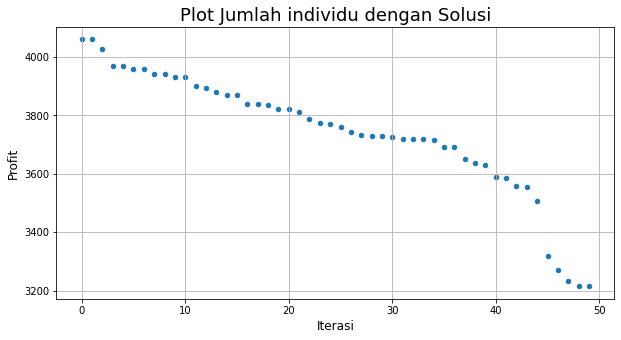

In [ ]:
# Solusi percobaan pertama pada parameter pertama 

solusi_p21 = pd.read_csv('./PSO_KP_hasil_0.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p21.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

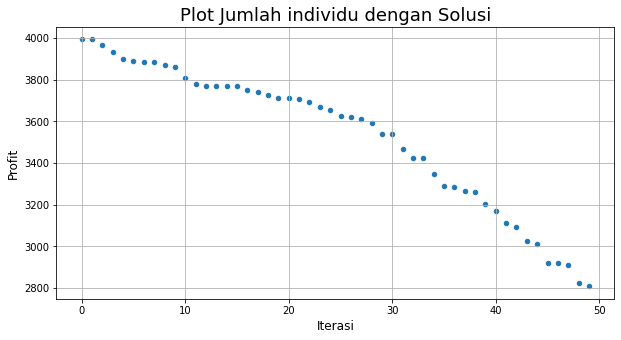

In [ ]:
# Solusi percobaan pertama pada parameter kedua

solusi_p22 = pd.read_csv('./PSO_KP_hasil_1.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p22.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

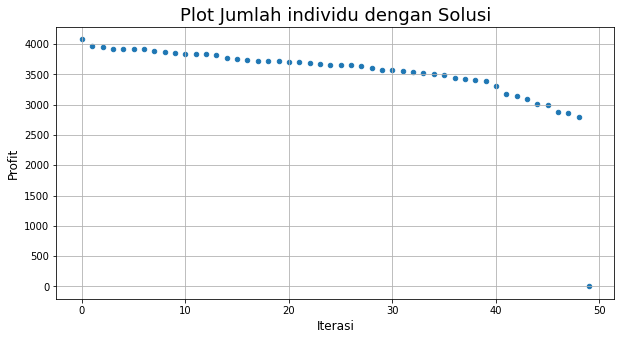

In [ ]:
# Solusi percobaan pertama pada parameter ketiga

solusi_p23 = pd.read_csv('./PSO_KP_hasil_2.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p23.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

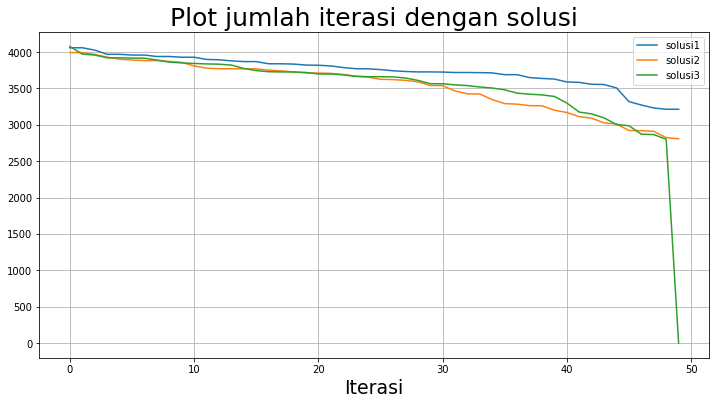

In [ ]:
# Visualisasi Hasil secara keseluruhan
plt.figure(figsize=(12,6))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=25)
solusi_p21.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi1')
solusi_p22.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi2')
solusi_p23.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi3')
ax.set_xlabel('Iterasi', fontsize = 19)
ax.grid()

# **Solusi PSO Percobaan 3**

In [ ]:
# import data dari url 
# Data Memvariasikan Nilai nilai w2 pada Params percobaan 2

url = 'https://drive.google.com/file/d/1xscugDdcp-pHVu28Vo0-1dgAntWumd99/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
params3 = pd.read_csv(url)  
params3 = pd.DataFrame(params3) 
params3.rename(columns = {'w1':'W1', 'w2':'W2'}, inplace=True)
params3['max_generasi'] = 10
params3.head()

,n_individu,n_barang,a,b,W1,W2,max_generasi,alpha,beta0,gamma,lim,vmax
0,50,48,-5,5,0.5,0.5,10,3,1,0.1,8000,100
1,50,48,-5,5,0.5,0.5,10,3,1,0.1,8000,70
2,50,48,-5,5,0.5,0.5,10,3,1,0.1,8000,40


In [ ]:
# Solusi Percobaan kedua
hasil3 = run_PSO(params3,data)
hasil3

[    Barang1  Barang2  Barang3  Barang4  Barang5  Barang6  Barang7  Barang8  \
 0       0.0      1.0      1.0      1.0      0.0      1.0      0.0      1.0   
 1       0.0      1.0      1.0      1.0      0.0      1.0      0.0      1.0   
 2       0.0      1.0      0.0      1.0      1.0      0.0      0.0      1.0   
 3       0.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
 4       0.0      1.0      1.0      1.0      1.0      0.0      0.0      1.0   
 5       0.0      1.0      0.0      1.0      1.0      1.0      0.0      1.0   
 6       0.0      1.0      0.0      1.0      0.0      1.0      0.0      1.0   
 7       0.0      1.0      0.0      1.0      1.0      0.0      0.0      1.0   
 8       0.0      1.0      1.0      1.0      0.0      1.0      0.0      1.0   
 9       1.0      1.0      1.0      1.0      1.0      1.0      0.0      1.0   
 10      0.0      1.0      1.0      0.0      1.0      1.0      0.0      1.0   
 11      0.0      1.0      1.0      0.0      1.0    

In [ ]:
save_PSO(hasil3) # Menyimpan Hasil ke dalam sebuah file csv

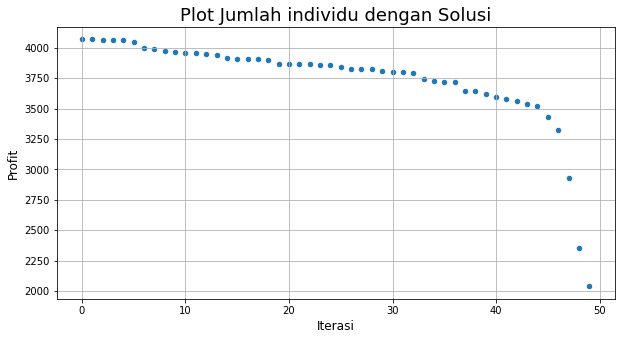

In [ ]:
# Solusi percobaan pertama pada parameter pertama 

solusi_p31 = pd.read_csv('./PSO_KP_hasil_0.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p31.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

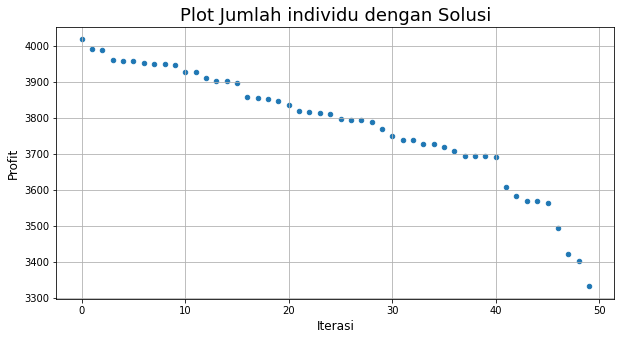

In [ ]:
# Solusi percobaan pertama pada parameter kedua

solusi_p32 = pd.read_csv('./PSO_KP_hasil_1.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p32.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

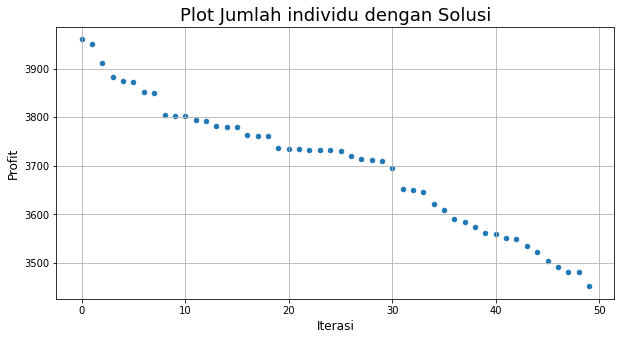

In [ ]:
# Solusi percobaan pertama pada parameter ketiga

solusi_p33 = pd.read_csv('./PSO_KP_hasil_2.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p33.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

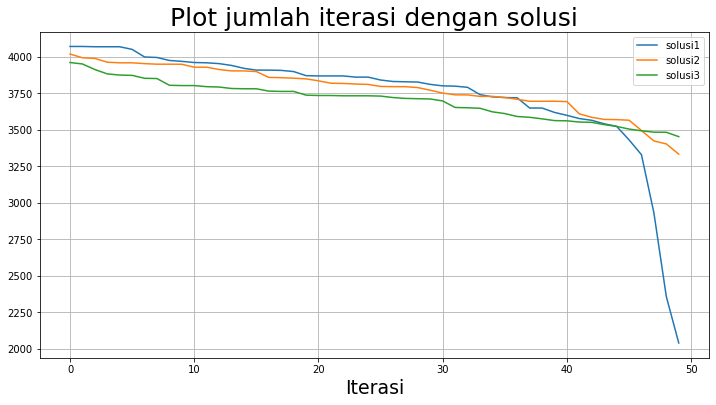

In [ ]:
# Visualisasi Hasil secara keseluruhan
plt.figure(figsize=(12,6))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=25)
solusi_p31.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi1')
solusi_p32.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi2')
solusi_p33.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi3')
ax.set_xlabel('Iterasi', fontsize = 19)
ax.grid()

# **Solusi PSO Percobaan 4**

In [ ]:
# import data dari url 
# Data Memvariasikan Nilai nilai individu pada Params percobaan 4

url = 'https://drive.google.com/file/d/1wSCHNYSqxRAbxbJYtGVZqh2i-lt45n92/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
params4 = pd.read_csv(url)  
params4 = pd.DataFrame(params4) 
params4.rename(columns = {'w1':'W1', 'w2':'W2'}, inplace=True)
params4['a'] = -8
params4['b'] = 8
# params4['W2'] = 1
params4['max_generasi'] = 10
params4.head()

,n_individu,n_barang,a,b,W1,W2,max_generasi,alpha,beta0,gamma,lim,vmax
0,20,48,-8,8,0.5,0.5,10,3,1,0.1,8000,100
1,50,48,-8,8,0.5,0.5,10,3,1,0.1,8000,100
2,100,48,-8,8,0.5,0.5,10,3,1,0.1,8000,100


In [ ]:
# Solusi Percobaan keempat
hasil4 = run_PSO(params4,data)
hasil4

[    Barang1  Barang2  Barang3  Barang4  Barang5  Barang6  Barang7  Barang8  \
 0       1.0      0.0      1.0      0.0      1.0      1.0      1.0      1.0   
 1       0.0      1.0      1.0      0.0      1.0      1.0      1.0      1.0   
 2       1.0      1.0      0.0      1.0      0.0      1.0      1.0      1.0   
 3       0.0      1.0      0.0      0.0      0.0      1.0      1.0      1.0   
 4       0.0      0.0      1.0      0.0      1.0      0.0      1.0      1.0   
 5       0.0      1.0      1.0      0.0      0.0      1.0      0.0      0.0   
 6       0.0      1.0      1.0      0.0      0.0      1.0      0.0      1.0   
 7       0.0      1.0      1.0      1.0      0.0      1.0      1.0      1.0   
 8       0.0      1.0      1.0      1.0      0.0      1.0      1.0      1.0   
 9       1.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0   
 10      1.0      0.0      1.0      0.0      0.0      0.0      1.0      1.0   
 11      1.0      1.0      1.0      0.0      0.0    

In [ ]:
save_PSO(hasil4) # Menyimpan Hasil ke dalam sebuah file csv

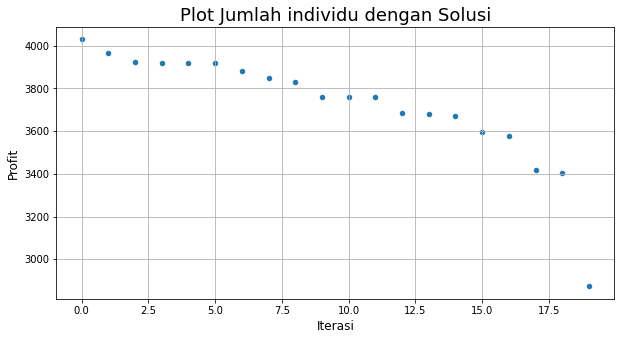

In [ ]:
# Solusi percobaan pertama pada parameter pertama 

solusi_p41 = pd.read_csv('./PSO_KP_hasil_0.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p41.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

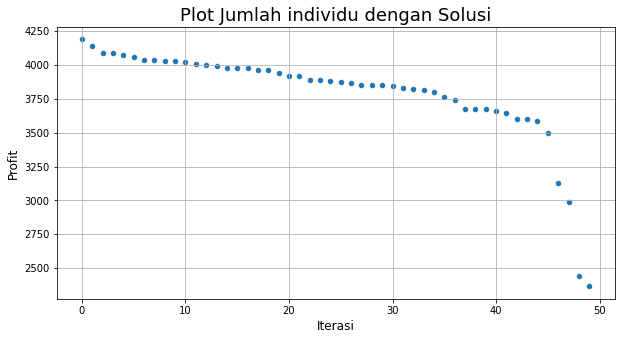

In [ ]:
# Solusi percobaan pertama pada parameter kedua

solusi_p42 = pd.read_csv('./PSO_KP_hasil_1.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p42.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

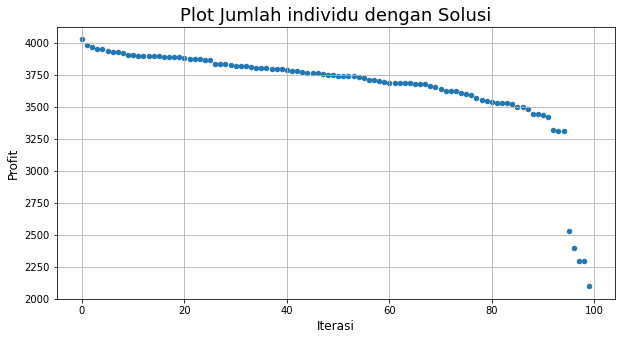

In [ ]:
# Solusi percobaan pertama pada parameter ketiga

solusi_p43 = pd.read_csv('./PSO_KP_hasil_2.csv')
plt.figure(figsize=(10,5))
ax=plt.gca()
ax.set_title('Plot Jumlah individu dengan Solusi', fontsize = 18)
solusi_p43.plot(ax = ax, kind ='scatter', x = 'Unnamed: 0', y ='Profit')
ax.set_xlabel('Iterasi', fontsize = 12)
ax.set_ylabel('Profit', fontsize = 12)
ax.grid()

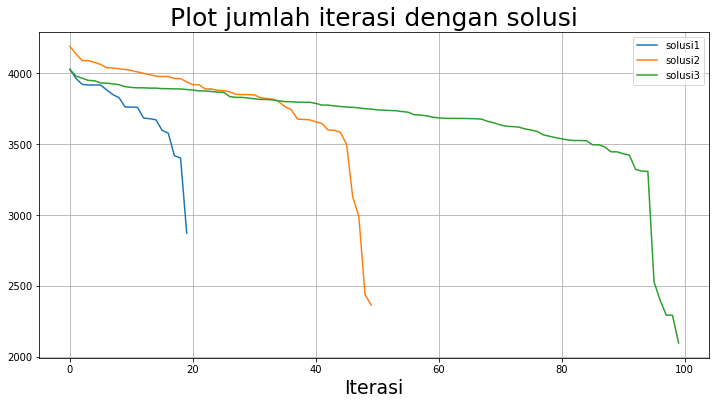

In [ ]:
# Visualisasi Hasil secara keseluruhan
plt.figure(figsize=(12,6))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=25)
solusi_p41.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi1')
solusi_p42.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi2')
solusi_p43.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi3')
ax.set_xlabel('Iterasi', fontsize = 19)
ax.grid()

# **Hasil**

**Solusi Terbaik**

In [ ]:
# Hasil terbaik dari setiap perulangan
# "Hasil 1" : 4270,
# "Hasil 2" : 4290,
# "Hasil 3" : 4114.5,

Hasil_best = [4270, 4290, 4114.5]    # List Hasil dari hasil 1 sampai 7
print(sorted(Hasil_best, key = None, reverse = True))           # Mengurutkan nilai Profit dari yang terbesar ke terkecil

[4290, 4270, 4114.5]


**Kesimpulan**

Solusi terbaik adalah Hasil ke 2 dengan nilai profit 4290.

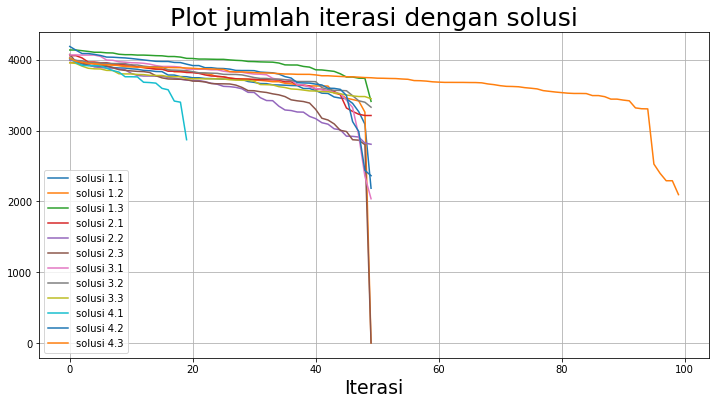

In [ ]:
# Visualisasi Hasil secara keseluruhan
plt.figure(figsize=(12,6))
ax=plt.gca()
ax.set_title('Plot jumlah iterasi dengan solusi', fontsize=25)
solusi_p11.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 1.1')
solusi_p12.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 1.2')
solusi_p13.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 1.3')
solusi_p21.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 2.1')
solusi_p22.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 2.2')
solusi_p23.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 2.3')
solusi_p31.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 3.1')
solusi_p32.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 3.2')
solusi_p33.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 3.3')
solusi_p41.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 4.1')
solusi_p42.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 4.2')
solusi_p43.plot(ax = ax, kind ='line', x = 'Unnamed: 0', y ='Profit', label = 'solusi 4.3')
ax.set_xlabel('Iterasi', fontsize = 19)
ax.grid()

**Parameter Terbaik**

In [ ]:
best_parameter = params4                          # Membaca data pada data params4
best_parameter.iloc[1]                            # Mencari nilai parameter pada index ke 1

n_individu        50.0
n_barang          48.0
a                 -8.0
b                  8.0
W1                 0.5
W2                 0.5
max_generasi      10.0
alpha              3.0
beta0              1.0
gamma              0.1
lim             8000.0
vmax             100.0
Name: 1, dtype: float64

Parameter terbaik adalah parameter yang digunakan pada hasil terbaik terbukti bahwa solusi terbaik ada pada hasil 2 percobaan ke-4. Sehingga menggunakan fungsi .iloc() dengan index 1.